In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Montreal Bikes

You can read data from a CSV file using the **read_csv** function. By default, it assumes that the fields are comma-separated.

We’re going to be looking some cyclist data from Montréal in 2012. This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [2]:
bikes = pd.read_csv(
    'https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/bikes.csv'
)


In [3]:
bikes.head()

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


### MESS!!!!

* not comma separated, separated by ";" ( not uncommon) 

In [4]:
bikes = pd.read_csv(
    'https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/bikes.csv',sep=";"
)

In [6]:
bikes.head()

,Date,Berri 1,Br�beuf (donn�es non disponibles),C�te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donn�es non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


## Better

In [14]:
#https://docs.python.org/3/library/codecs.html#standard-encodings

In [15]:
bikes = pd.read_csv(
    'https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/bikes.csv',sep=";",encoding="cp1252"
)
bikes.head()

,Date,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


In [18]:
bikes = pd.read_csv(
    'https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/bikes.csv', sep=';', encoding='latin1',
    parse_dates=['Date'], dayfirst=True, index_col='Date'
)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                 310 non-null int64
BrÃ©beuf (donnÃ©es non disponibles)     0 non-null float64
CÃ´te-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                           310 non-null int64
Maisonneuve 2                           310 non-null int64
du Parc                                 310 non-null int64
Pierre-Dupuy                            310 non-null int64
Rachel1                                 310 non-null int64
St-Urbain (donnÃ©es non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


In [19]:
bikes.shape

(310, 9)

In [20]:
bikes.head()

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


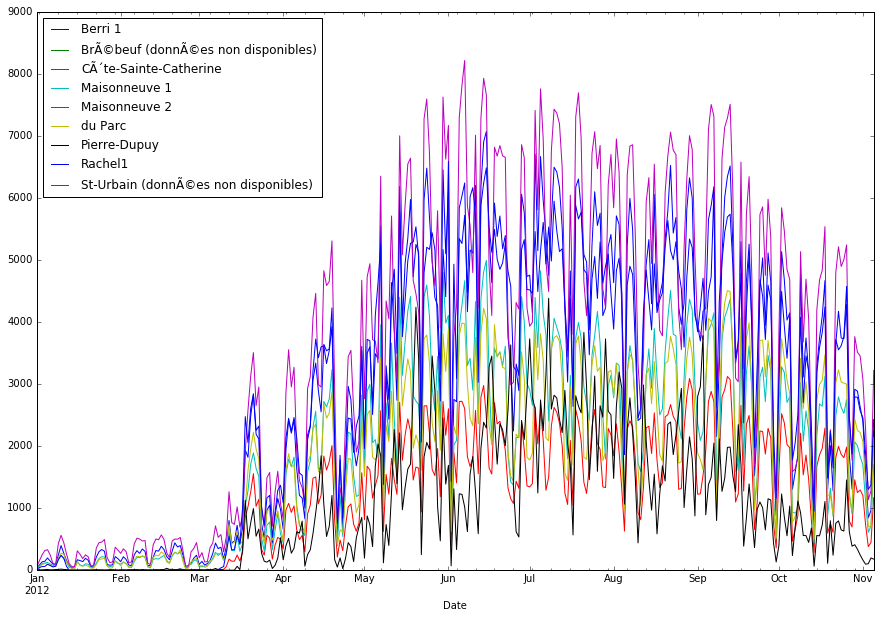

In [21]:
bikes.plot(figsize=(15, 10))
plt.show()

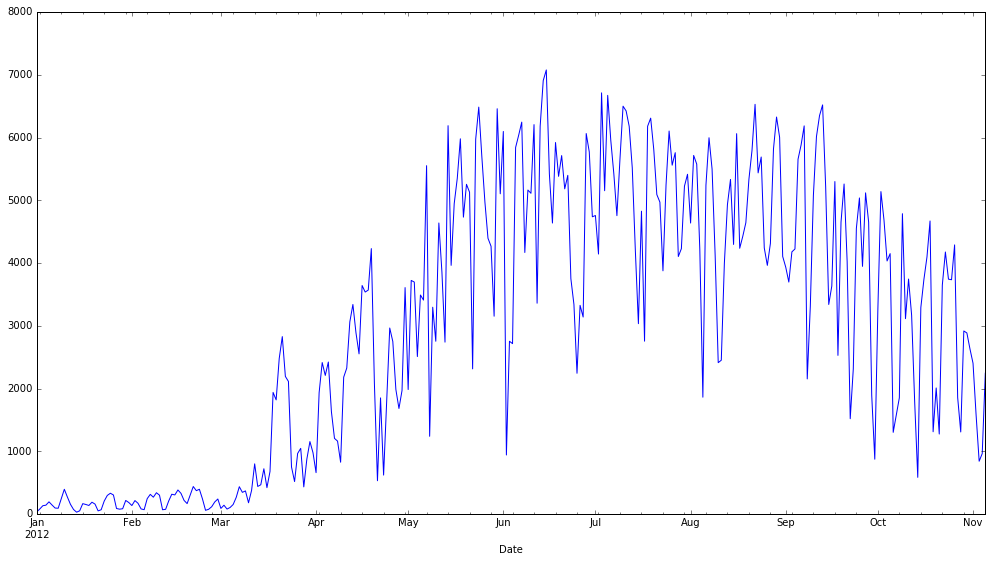

In [22]:
bikes["Berri 1"].plot(figsize=(17, 9))

In [23]:
# Make a copy of only the "Berri 1" data
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. It's basically all the days of the year. Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [24]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [25]:
berri_bikes.index.dtype

dtype('<M8[ns]')

In [26]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

We actually want the weekday (Which day of the week is it?) 

Monday = 0, Sunday = 6

In [27]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

These are the days of the week, where 0 is Monday.

Now that we know how to get the weekday, we can add it as a column in our dataframe like this:

In [28]:
#berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes["weekday"] = berri_bikes.index.weekday

#berri_bikes[:5]
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


Adding up cyclists by weekday

In [29]:
weekday_counts = berri_bikes.groupby('weekday').sum()
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [30]:
weekday_counts.index = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


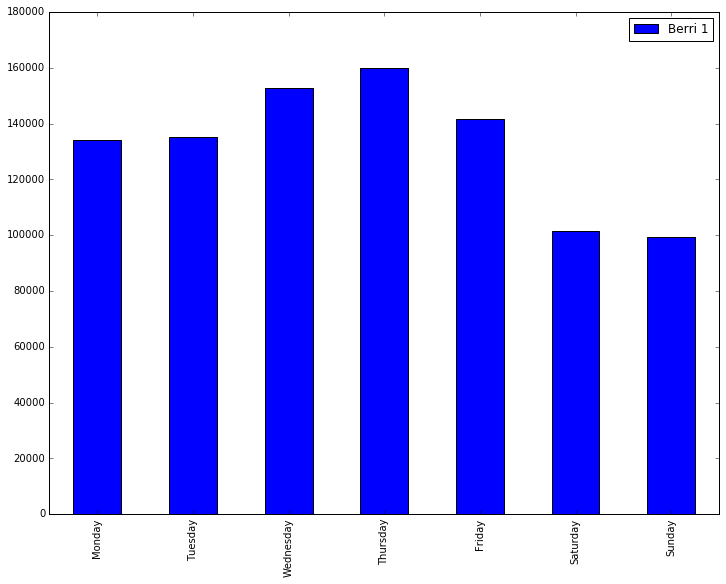

In [31]:
weekday_counts.plot(kind='bar', figsize=(12, 9))

In [32]:
# TODO: Repeat the above exercise with Month

# N.B. This data set is not for the full year. It only contains data until early november.

berri_bikes.tail(5)

,Berri 1,weekday
Date,,
2012-11-01,2405,3
2012-11-02,1582,4
2012-11-03,844,5
2012-11-04,966,6
2012-11-05,2247,0


In [33]:
berri_bikes.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [34]:
berri_bikes["month"] = berri_bikes.index.month
berri_bikes.tail(10)

,Berri 1,weekday,month
Date,,,
2012-10-27,1857,5,10
2012-10-28,1310,6,10
2012-10-29,2919,0,10
2012-10-30,2887,1,10
2012-10-31,2634,2,10
2012-11-01,2405,3,11
2012-11-02,1582,4,11
2012-11-03,844,5,11
2012-11-04,966,6,11


In [35]:
month_counts = berri_bikes.groupby("month").sum()
month_counts

,Berri 1,weekday
month,,
1,4915,91
2,6712,86
3,26229,96
4,67699,90
5,133274,90
6,144849,93
7,162562,91
8,149227,93
9,127061,95


In [36]:
month_counts.index = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"
]
month_counts

,Berri 1,weekday
January,4915,91
February,6712,86
March,26229,96
April,67699,90
May,133274,90
June,144849,93
July,162562,91
August,149227,93
September,127061,95
October,94793,87


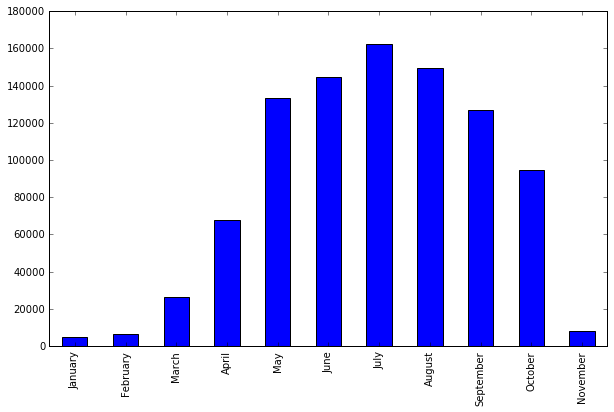

In [37]:
month_counts["Berri 1"].plot(kind='bar', figsize=(10, 6))

<br>

## Persistence

Data in a DataFrame can be saved to a file or a database. Lets look at both scenarios.

### Save to File

In [38]:
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


In [39]:
# Saves all the data including the index
weekday_counts.to_csv("bike_travel_weekday_count.csv")